# EDA-технології

### ТЕОРЕТИЧНА ЧАСТИНА ТА ПРИКЛАДИ

[EDA](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - розвідувательний (дослідницький) аналіз даних - це технологія, яка межує з технологіями __Data Mining__ та __Data Science__.

Інструментальні засоби EDA призначені для швидкого та наглядного відображення статистичних властивостей даних, що отримані на попередніх етапах Data Mining.

Існують високорівневі засоби EDA:
- [IDE RStudio](https://www.r-studio.com/ru/), 
- [RapidMiner](https://rapidminer.com/get-started/),
- [MATLAB](https://www.mathworks.com/products/matlab.html) та ін.;

Python-бібліотеки з відкритим кодом:
- [SeaBorn](https://seaborn.pydata.org)
- [Sweetviz](https://pypi.org/project/sweetviz/)
- [Pandas-profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/) 
та деякі менш розповсюджені


В основі більшості з вищезгаданих технологій лежіть бібліотека візуалізації даних [Matplotlib](https://ru.wikipedia.org/wiki/Matplotlib) яка тісно пов'язана з датасетами _Pandas_ та масивами _NumPy_

[__Matplotlib__](https://matplotlib.org) - це низькорівнева графічна бібліотека для python з [відкритим кодом](https://github.com/matplotlib/matplotlib) написана на python, частково на _C_, _objective-C_ та _javascript_.

In [3]:
# перевіримо наявність бібліотеки matplotlib
!pip list | grep matplot

"grep" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
# якщо її немає на комп'ютері, то встановимо
!pip install matplotlib

In [4]:
# підключення бібліотеки 
import matplotlib

In [5]:
print(dir(matplotlib))

['ExecutableNotFoundError', 'MatplotlibDeprecationWarning', 'MutableMapping', 'Parameter', 'Path', 'RcParams', '_ExecInfo', '_VersionInfo', '__bibtex__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_add_data_doc', '_all_deprecated', '_api', '_c_internal_utils', '_check_versions', '_cm', '_cm_listed', '_color_data', '_deprecated_ignore_map', '_deprecated_map', '_deprecated_remain_as_none', '_ensure_handler', '_enums', '_get_config_or_cache_dir', '_get_executable_info', '_get_ssl_context', '_get_version', '_get_xdg_cache_dir', '_get_xdg_config_dir', '_init_tests', '_label_from_arg', '_log', '_logged_cached', '_open_file_or_url', '_parse_to_version_info', '_path', '_preprocess_data', '_rc_params_in_file', '_replacer', '_version', 'atexit', 'bezier', 'cbook', 'checkdep_usetex', 'cm', 'colormaps', 'colors', 'contextlib', 'cycler', 'defaultParams', 'default_test_modules', 'docstring', 'fontconfig_patter

In [108]:
# основним об'єктом в `matplotlib` є `plot` що розташований в модулі `pyplot`
from matplotlib import pyplot as plt

In [109]:
print(dir(plt))

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Figure', 'FigureCanvasBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MouseButton', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotSpec', 'Text', 'TickHelper', 'Widget', '_INSTALL_FIG_OBSERVER', '_IP_REGISTERED', '_IoffContext', '_IonContext', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_draw_if_interactive', '_backend_mod', '_copy_docstring_and_deprecators', '_get_required_interactive_framework', '_interactive_bk', '_log', '_pylab_helpers', '_setup_pyplot_info_docstrings', '_warn_if_gui_out_of_main_thread', '_xkcd', 'acorr

In [110]:
print(plt.__doc__)


`matplotlib.pyplot` is a state-based interface to matplotlib. It provides
an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
screen, and acts as the figure GUI manager.

pyplot is mainly intended for interactive plots and simple cases of
programmatic plot generation::

    import numpy as np
    import matplotlib.pyplot as plt

    x = np.arange(0, 5, 0.1)
    y = np.sin(x)
    plt.plot(x, y)

The explicit (object-oriented) API is recommended for complex plots, though
pyplot is still usually used to create the figure and often the axes in the
figure. See `.pyplot.figure`, `.pyplot.subplots`, and
`.pyplot.subplot_mosaic` to create figures, and
:doc:`Axes API <../axes_api>` for the plotting methods on an axes::

    import numpy as np
    import matplotlib.pyplot as plt

    x = np.arange(0, 5, 0.1)
    y = np.sin(x)
    fig, ax = plt.subplots()
    ax.plot(x, y)



In [111]:
plt.plot?

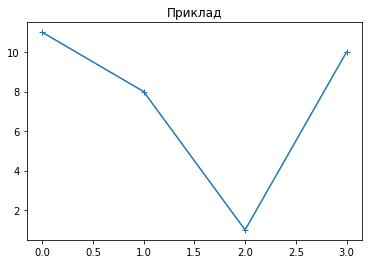

In [112]:
import numpy as np
ypoints = np.array([11, 8, 1, 10])

plt.plot(ypoints, marker = '+')
plt.title("Приклад")
plt.show()

### ПРИКЛАД ПОШУКУ АНОМАЛІЙ ТА ВІДНОВЛЕННЯ ДАНИХ

Оцінити та поліпшити якість даних про продаж нерухомості, які накопичені в файлі `aprt_properties.csv`


Приведення даних до якості наобхідної для подальшого використання в моделях ML складається з декількох етапів:
1. _Оцінка структури_ - визначення показчиків, які мають сенс в данному контексті та вилучення тих, що не є необхідними.
2. _Приведення типів_ показчиків до придатності проведення чисельного аналізу та моделювання
3. _Відновлення пропущених даних (missing data recovery)_ - застосування методів, які дозволяють відновити дані в яких відсутні значення (NaN, None, Null, '', ...)
4. _Виявленя аномалій (outliers detection)_ - показчиків, значення яких не є допустимим в контексті аналізу.

In [113]:
pd.set_option?

In [114]:
import pandas as pd
import numpy as np

pd.set_option("display.float_format", '{:.1f}'.format)

In [115]:
# створюємо датафрейм та завантажуємо в нього csv-файл 
aprt = pd.read_csv('aprt_properties.csv', 
                    names=['ціна', 
                           'кімнат', 
                           'ціна за метр',
                           'поверх',
                           'всього поверхів',
                           'рік збудови',
                           'площа',
                           'житлова площа',
                           'кухня',
                           'вулиця',
                           'дата пропозиції'],
                   index_col = False,
                  )

#### загальна інформація проо дані

In [116]:
# вивести 5 перших рядків датасету
aprt.head(5)

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня,вулиця,дата пропозиції
0,140000.0,2,2258.0,7,9,1969,62.0,47.0,9.0,Омеляновича-Павленка,3 вересня 2020 р.
1,105000.0,4,847.0,25,26,2018,124.0,71.0,16.0,,7 жовтня 2020 р.
2,175000.0,3,1786.0,25,26,2010,98.0,None,None,Ованеса Туманяна,1 жовтня 2020 р.
3,30970.0,1,1106.0,12,13,2013,28.0,13.0,5.0,Петропавлівська,1 лютого
4,82000.0,2,1281.0,18,26,None,64.0,None,None,Дніпровська,*** not found


In [117]:
# оцінка типів показчиків
aprt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             728 non-null    float64
 1   кімнат           728 non-null    object 
 2   ціна за метр     728 non-null    object 
 3   поверх           728 non-null    object 
 4   всього поверхів  728 non-null    object 
 5   рік збудови      728 non-null    object 
 6   площа            728 non-null    object 
 7   житлова площа    728 non-null    object 
 8   кухня            728 non-null    object 
 9   вулиця           728 non-null    object 
 10  дата пропозиції  728 non-null    object 
dtypes: float64(1), object(10)
memory usage: 62.7+ KB


In [118]:
# перелік колонок датасета
aprt.columns

Index(['ціна', 'кімнат', 'ціна за метр', 'поверх', 'всього поверхів',
       'рік збудови', 'площа', 'житлова площа', 'кухня', 'вулиця',
       'дата пропозиції'],
      dtype='object')

In [119]:
# вилучення непотрібних колонок
aprt.drop(columns=['вулиця','дата пропозиції'], inplace=True)

In [120]:
aprt.head(3)

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
0,140000.0,2,2258.0,7,9,1969,62.0,47.0,9.0
1,105000.0,4,847.0,25,26,2018,124.0,71.0,16.0
2,175000.0,3,1786.0,25,26,2010,98.0,None,None


#### перетворення типів показчиків

In [121]:
aprt.columns

Index(['ціна', 'кімнат', 'ціна за метр', 'поверх', 'всього поверхів',
       'рік збудови', 'площа', 'житлова площа', 'кухня'],
      dtype='object')

In [122]:
pd.to_numeric?

In [123]:
for prop in aprt.columns:
    aprt[prop] = pd.to_numeric(aprt[prop], errors='coerce')

In [124]:
aprt.head(3)

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,NaN,NaN


In [125]:
aprt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             728 non-null    float64
 1   кімнат           724 non-null    float64
 2   ціна за метр     723 non-null    float64
 3   поверх           703 non-null    float64
 4   всього поверхів  703 non-null    float64
 5   рік збудови      540 non-null    float64
 6   площа            640 non-null    float64
 7   житлова площа    497 non-null    float64
 8   кухня            524 non-null    float64
dtypes: float64(9)
memory usage: 51.3 KB


In [126]:
aprt.describe()

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
count,728.0,724.0,723.0,703.0,703.0,540.0,640.0,497.0,524.0
mean,200138.4,2.2,2090.3,9.6,17.7,1996.7,79.9,42.3,15.9
std,674893.9,1.0,5900.9,6.9,8.5,27.1,51.1,30.6,10.0
min,10092.1,1.0,478.0,1.0,2.0,1860.0,15.0,10.0,3.0
25%,65000.0,1.0,1147.0,4.0,9.0,1977.0,50.0,25.0,10.0
50%,103950.0,2.0,1562.0,8.0,19.0,2010.0,68.5,37.0,14.0
75%,170000.0,3.0,2188.0,14.0,25.0,2016.0,92.2,50.0,18.0
max,15700000.0,7.0,157000.0,33.0,47.0,2021.0,520.0,320.0,78.0


#### відновлення пропущених даних

__Методи, що використовуються для відновлення даних:__
1. Вилучення пропущених даних
2. Заповнення пропущених даних обрахованим статистичним показчиком або константою
3. [Інтерполяція пропущених даних](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)
4. Використання моделей ML та DL для прогнозування пропущених даних

In [127]:
# статистика пропущених даних
# в табличній формі
aprt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             728 non-null    float64
 1   кімнат           724 non-null    float64
 2   ціна за метр     723 non-null    float64
 3   поверх           703 non-null    float64
 4   всього поверхів  703 non-null    float64
 5   рік збудови      540 non-null    float64
 6   площа            640 non-null    float64
 7   житлова площа    497 non-null    float64
 8   кухня            524 non-null    float64
dtypes: float64(9)
memory usage: 51.3 KB


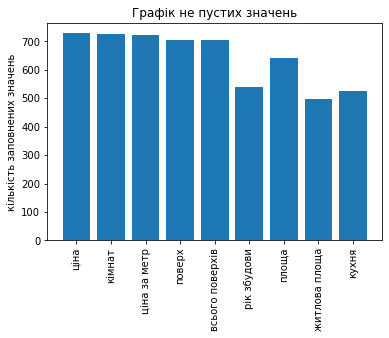

In [128]:
# або в графічній формі
plt.bar(aprt.columns, aprt.count())
plt.ylabel("кількість заповнених значень")
plt.xticks(rotation='vertical')
plt.title('Графік не пустих значень')
plt.show()

In [129]:
missing_data_mask = aprt.isna()

In [130]:
missing_data_mask.head(5)

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,True,True


In [131]:
# частка пропущених даних
missing_fruction = missing_data_mask.sum(axis=1)/len(aprt.columns)

In [132]:
len(missing_fruction)

728

In [133]:
missing_fruction.head(10)

0   0.0
1   0.0
2   0.2
3   0.0
4   0.3
5   0.0
6   0.2
7   0.0
8   0.0
9   0.2
dtype: float64

In [134]:
# вилученя рядків що містять 5 або більше відсутніх показчиків
aprt.dropna(thresh=5, inplace=True)

In [135]:
aprt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 727
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             706 non-null    float64
 1   кімнат           704 non-null    float64
 2   ціна за метр     705 non-null    float64
 3   поверх           703 non-null    float64
 4   всього поверхів  703 non-null    float64
 5   рік збудови      539 non-null    float64
 6   площа            623 non-null    float64
 7   житлова площа    497 non-null    float64
 8   кухня            524 non-null    float64
dtypes: float64(9)
memory usage: 55.2 KB


In [136]:
aprt.mean(axis=0)

ціна              195986.3
кімнат                 2.2
ціна за метр        2066.1
поверх                 9.6
всього поверхів       17.7
рік збудови         1996.7
площа                 79.6
житлова площа         42.3
кухня                 15.9
dtype: float64

In [137]:
aprt.median(axis=0)

ціна              101250.0
кімнат                 2.0
ціна за метр        1550.0
поверх                 8.0
всього поверхів       19.0
рік збудови         2010.0
площа                 69.0
житлова площа         37.0
кухня                 14.0
dtype: float64

In [138]:
# вибір заповнювача - побудуємо допоміжний датафрейм
pd.DataFrame(data={"Mean"      : aprt.mean(axis=0),
                   "Median"    : aprt.median(axis=0),
                   "Std"       : aprt.std(axis=0),
                   "Mean - Std": aprt.mean(axis=0) - aprt.std(axis=0)} )

,Mean,Median,Std,Mean - Std
ціна,195986.3,101250.0,681978.0,-485991.7
кімнат,2.2,2.0,1.0,1.2
ціна за метр,2066.1,1550.0,5968.9,-3902.8
поверх,9.6,8.0,6.9,2.7
всього поверхів,17.7,19.0,8.5,9.2
рік збудови,1996.7,2010.0,27.2,1969.5
площа,79.6,69.0,50.5,29.2
житлова площа,42.3,37.0,30.6,11.7
кухня,15.9,14.0,10.0,5.8


In [139]:
# заповнити пропущені дані медіаной відповідного показчика
aprt.fillna(aprt.median(), axis=0, inplace=True)

In [140]:
aprt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 727
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             706 non-null    float64
 1   кімнат           706 non-null    float64
 2   ціна за метр     706 non-null    float64
 3   поверх           706 non-null    float64
 4   всього поверхів  706 non-null    float64
 5   рік збудови      706 non-null    float64
 6   площа            706 non-null    float64
 7   житлова площа    706 non-null    float64
 8   кухня            706 non-null    float64
dtypes: float64(9)
memory usage: 55.2 KB


#### виявленя аномалій в даних

In [141]:
# аналітични метод
aprt.describe()

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
count,706.0,706.0,706.0,706.0,706.0,706.0,706.0,706.0,706.0
mean,195986.3,2.2,2065.4,9.6,17.7,1999.8,78.4,40.7,15.4
std,681978.0,1.0,5964.7,6.9,8.4,24.4,47.5,25.8,8.7
min,29256.6,1.0,478.0,1.0,2.0,1860.0,25.0,10.0,3.0
25%,65000.0,1.0,1146.6,4.0,9.0,1994.0,53.0,30.0,11.0
50%,101250.0,2.0,1550.0,8.0,19.0,2010.0,69.0,37.0,14.0
75%,165750.0,3.0,2140.0,14.0,25.0,2015.0,89.0,44.0,16.0
max,15700000.0,7.0,157000.0,33.0,47.0,2021.0,520.0,320.0,78.0


In [50]:
# графічний метод
import matplotlib.pyplot as plt

In [86]:
# plt.figure(figsize=(7,7))
plt.plot(aprt['кухня'], '.')
plt.title('пошук аномалій в показчику')
plt.xlabel('рядки датасету')
plt.ylabel('м2')
plt.show()

NameError: name 'aprt' is not defined

In [144]:
aprt.head()

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0
4,82000.0,2.0,1281.0,18.0,26.0,2010.0,64.0,37.0,14.0


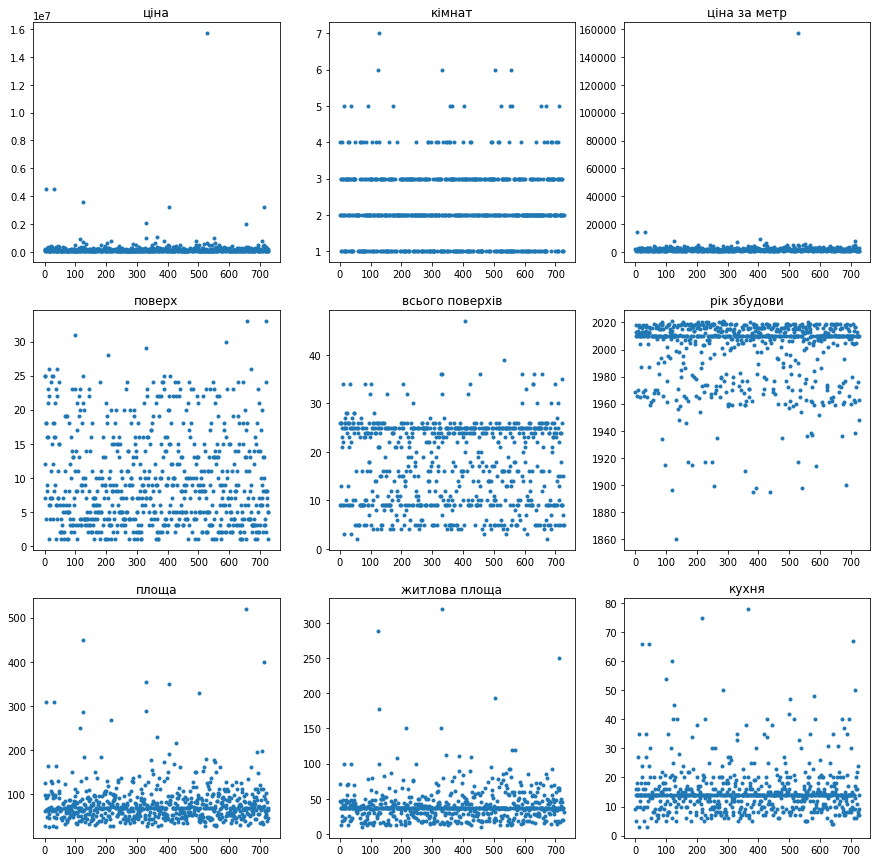

In [145]:
# загальна аналітика аномалій по датасету
fig, axs = plt.subplots(3,3, figsize=(15,15))

for ax, name in list(zip(axs.reshape(9,), aprt.columns)):
    ax.set_title(name)

axs[0,0].plot(aprt['ціна'], '.')
axs[0,1].plot(aprt['кімнат'], '.')
axs[0,2].plot(aprt['ціна за метр'], '.')

axs[1,0].plot(aprt['поверх'], '.')
axs[1,1].plot(aprt['всього поверхів'], '.')
axs[1,2].plot(aprt['рік збудови'], '.')

axs[2,0].plot(aprt['площа'], '.')
axs[2,1].plot(aprt['житлова площа'], '.')
axs[2,2].plot(aprt['кухня'], '.')

plt.show()


In [146]:
aprt[aprt['ціна'] == 15700000.0]

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
529,15700000.0,3.0,157000.0,2.0,4.0,1917.0,100.0,76.0,12.0


In [147]:
aprt[aprt['кухня'] == 78]

,ціна,кімнат,ціна за метр,поверх,всього поверхів,рік збудови,площа,житлова площа,кухня
365,1035900.0,5.0,4504.0,4.0,8.0,2016.0,230.0,75.0,78.0


### ІНДИВІДУАЛЬНЕ ЗАВДАННЯ

Користуючись результатами, що отримані в [Лабораторній роботі № 3](https://shkliarskiy.moodlecloud.com/mod/page/view.php?id=1193) поліпшити якість показчика .

__Постановка__: В 3-й лабораторній роботі отримано показчик, що характеризує окрему властивість квартири (ціна, метраж та ін.). 
Необхідно:
1. Перетворити тип показчика в той, який придатний для чисельного аналізу
2. Оцінити ступінь "разрядженності" показчика та вибрати стратегію його відновлення
3. Відновити пропущені значення прказчика
4. Виявити аномальні значення та дати їм графічну інтерпретацію


In [3]:
# імпортувати бібліотеки Pandas, Matplotlib, Numpy
import matplotlib
import pandas as pd
import numpy as np

In [4]:
# створити датасет з вашим показчиком з файлу 'aprt_properties.csv' usecols=[0, 1, 10, 9]
dataset = pd.read_csv('aprt_properties.csv', usecols=[0,1,2,4,5,6], names=['ціна', 
                           'кімнат', 
                           'ціна за метр',
                           'всього поверхів',
                           'рік збудови',
                           'площа'])

In [5]:
# вивести перші десять рядків датасету
dataset.head(10)

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
0,140000.0,2,2258.0,9,1969,62.0
1,105000.0,4,847.0,26,2018,124.0
2,175000.0,3,1786.0,26,2010,98.0
3,30970.0,1,1106.0,13,2013,28.0
4,82000.0,2,1281.0,26,None,64.0
5,168535.7,3,1872.6,9,1966,90.0
6,4500000.0,4,14610.0,21,2011,308.0
7,135000.0,2,2077.0,23,2012,65.0
8,120000.0,1,2500.0,25,2012,48.0
9,57500.0,3,625.0,9,1970,92.0


In [6]:
# вивести загальну інформацію про датасет
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             728 non-null    float64
 1   кімнат           728 non-null    object 
 2   ціна за метр     728 non-null    object 
 3   всього поверхів  728 non-null    object 
 4   рік збудови      728 non-null    object 
 5   площа            728 non-null    object 
dtypes: float64(1), object(5)
memory usage: 34.2+ KB


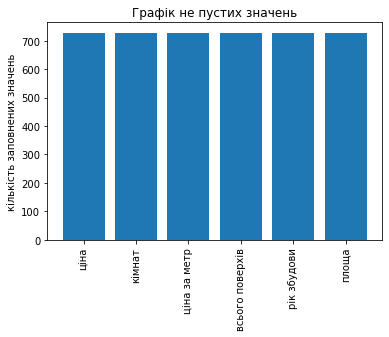

In [7]:
import matplotlib.pyplot as plt
plt.bar(dataset.columns, dataset.count())
plt.ylabel("кількість заповнених значень")
plt.xticks(rotation='vertical')
plt.title('Графік не пустих значень')
plt.show()

In [8]:
# перетворити тип даних в показчику на чисельний
dataset.columns

Index(['ціна', 'кімнат', 'ціна за метр', 'всього поверхів', 'рік збудови',
       'площа'],
      dtype='object')

In [9]:
pd.to_numeric?

In [10]:
for prop in dataset.columns:
    dataset[prop] = pd.to_numeric(dataset[prop], errors='coerce')

In [11]:
dataset.head(3)

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
0,140000.0,2.0,2258.0,9.0,1969.0,62.0
1,105000.0,4.0,847.0,26.0,2018.0,124.0
2,175000.0,3.0,1786.0,26.0,2010.0,98.0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             728 non-null    float64
 1   кімнат           724 non-null    float64
 2   ціна за метр     723 non-null    float64
 3   всього поверхів  703 non-null    float64
 4   рік збудови      540 non-null    float64
 5   площа            640 non-null    float64
dtypes: float64(6)
memory usage: 34.2 KB


In [13]:
dataset.describe()

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
count,7.280000e+02,724.000000,723.000000,703.000000,540.000000,640.000000
mean,2.001384e+05,2.226519,2090.259059,17.695590,1996.662963,79.928125
std,6.748939e+05,1.027190,5900.910584,8.458113,27.125786,51.143278
min,1.009210e+04,1.000000,478.000000,2.000000,1860.000000,15.000000
25%,6.500000e+04,1.000000,1147.000000,9.000000,1977.000000,50.000000
50%,1.039500e+05,2.000000,1562.000000,19.000000,2010.000000,68.500000
75%,1.700000e+05,3.000000,2188.000000,25.000000,2016.000000,92.250000
max,1.570000e+07,7.000000,157000.000000,47.000000,2021.000000,520.000000


In [14]:
# оцінити кількість та відновити дані, що відсутні 
missing_data_mask = dataset.isna()
missing_data_mask.head(5)

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,False


In [15]:
missing_fruction = missing_data_mask.sum(axis=1)/len(dataset.columns)


In [16]:
len(missing_fruction)
missing_fruction.head(10)

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.166667
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
dtype: float64

In [17]:
dataset.dropna(thresh=5, inplace=True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 727
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             661 non-null    float64
 1   кімнат           660 non-null    float64
 2   ціна за метр     661 non-null    float64
 3   всього поверхів  659 non-null    float64
 4   рік збудови      537 non-null    float64
 5   площа            622 non-null    float64
dtypes: float64(6)
memory usage: 36.1 KB


In [19]:
dataset.mean(axis=0)

ціна               203217.429047
кімнат                  2.251515
ціна за метр         2119.472163
всього поверхів        17.417299
рік збудови          1996.819367
площа                  79.700965
dtype: float64

In [20]:
dataset.median(axis=0)

ціна               105000.0
кімнат                  2.0
ціна за метр         1583.0
всього поверхів        18.0
рік збудови          2010.0
площа                  69.0
dtype: float64

In [21]:
pd.DataFrame(data={"Mean"      : dataset.mean(axis=0),
                   "Median"    : dataset.median(axis=0),
                   "Std"       : dataset.std(axis=0),
                   "Mean - Std": dataset.mean(axis=0) - dataset.std(axis=0)} )

,Mean,Median,Std,Mean - Std
ціна,203217.429047,105000.0,703896.259066,-500678.830019
кімнат,2.251515,2.0,1.017486,1.234029
ціна за метр,2119.472163,1583.0,6159.780729,-4040.308565
всього поверхів,17.417299,18.0,8.342975,9.074324
рік збудови,1996.819367,2010.0,27.042789,1969.776577
площа,79.700965,69.0,50.505088,29.195877


In [22]:
dataset.fillna(dataset.median(), axis=0, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 727
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ціна             661 non-null    float64
 1   кімнат           661 non-null    float64
 2   ціна за метр     661 non-null    float64
 3   всього поверхів  661 non-null    float64
 4   рік збудови      661 non-null    float64
 5   площа            661 non-null    float64
dtypes: float64(6)
memory usage: 36.1 KB


In [23]:
# оцінити на графіку та аналітично аномалії в значенях вашого показчика 
dataset.describe()

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
count,6.610000e+02,661.000000,661.000000,661.000000,661.000000,661.000000
mean,2.032174e+05,2.251135,2119.472163,17.419062,1999.291982,79.069592
std,7.038963e+05,1.016762,6159.780729,8.330386,24.908458,49.055114
min,2.990000e+04,1.000000,478.000000,2.000000,1860.000000,25.000000
25%,6.650000e+04,1.000000,1172.000000,9.000000,1990.000000,52.000000
50%,1.050000e+05,2.000000,1583.000000,18.000000,2010.000000,69.000000
75%,1.750000e+05,3.000000,2188.000000,25.000000,2015.000000,90.000000
max,1.570000e+07,7.000000,157000.000000,47.000000,2021.000000,520.000000


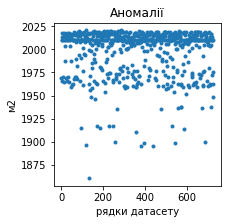

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
0,140000.0,2.0,2258.0,9.0,1969.0,62.0
1,105000.0,4.0,847.0,26.0,2018.0,124.0
2,175000.0,3.0,1786.0,26.0,2010.0,98.0
3,30970.0,1.0,1106.0,13.0,2013.0,28.0
4,82000.0,2.0,1281.0,26.0,2010.0,64.0


In [24]:
plt.figure(figsize=(3,3))
plt.plot(dataset['рік збудови'], '.')
plt.title('Аномалії')
plt.xlabel('рядки датасету')
plt.ylabel('м2')
plt.show()

dataset.head()

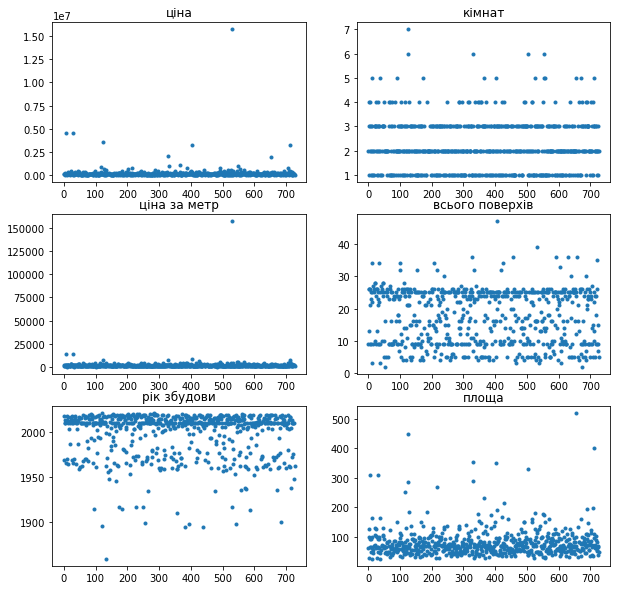

In [25]:
fig, axs = plt.subplots(3,2, figsize=(10,10))

for ax, name in list(zip(axs.reshape(6,), dataset.columns)):
    ax.set_title(name)

axs[0,0].plot(dataset['ціна'], '.')
axs[0,1].plot(dataset['кімнат'], '.')
axs[1,0].plot(dataset['ціна за метр'], '.')
axs[1,1].plot(dataset['всього поверхів'], '.')
axs[2,0].plot(dataset['рік збудови'], '.') 
axs[2,1].plot(dataset['площа'], '.')

plt.show()

In [26]:
dataset[dataset['ціна'] == 82000.0]

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
4,82000.0,2.0,1281.0,26.0,2010.0,64.0
28,82000.0,2.0,1281.0,26.0,2010.0,64.0


In [31]:
dataset[dataset['площа'] == 62]

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
0,140000.0,2.0,2258.0,9.0,1969.0,62.0
24,140000.0,2.0,2258.0,9.0,1969.0,62.0
112,275000.0,2.0,4435.0,28.0,2013.0,62.0
244,65000.0,2.0,1048.0,17.0,2018.0,62.0
270,58900.0,2.0,950.0,25.0,2010.0,62.0
289,68800.0,3.0,1110.0,12.0,1977.0,62.0
601,57000.0,2.0,919.0,21.0,2010.0,62.0
635,57000.0,2.0,919.0,25.0,2010.0,62.0
675,65000.0,3.0,1048.0,9.0,1960.0,62.0


In [32]:
dataset[dataset['всього поверхів'] == 20]

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
247,100000.0,2.0,1562.0,20.0,2010.0,64.0
297,200000.0,2.0,2564.0,20.0,2005.0,78.0
407,85000.0,3.0,1104.0,20.0,1998.0,77.0
449,206000.0,3.0,1943.0,20.0,2008.0,106.0
457,70000.0,3.0,745.0,20.0,2014.0,94.0
596,190000.0,2.0,3585.0,20.0,2019.0,53.0
689,268000.0,4.0,1381.0,20.0,2010.0,194.0


In [33]:
dataset[dataset['рік збудови'] == 2010]

,ціна,кімнат,ціна за метр,всього поверхів,рік збудови,площа
2,175000.0,3.0,1786.0,26.0,2010.0,98.0
4,82000.0,2.0,1281.0,26.0,2010.0,64.0
13,65000.0,1.0,2600.0,3.0,2010.0,25.0
18,84000.0,2.0,1273.0,26.0,2010.0,66.0
26,175000.0,3.0,1786.0,26.0,2010.0,98.0
...,...,...,...,...,...,...
707,796000.0,4.0,4020.0,15.0,2010.0,198.0
720,43000.0,2.0,782.0,26.0,2010.0,55.0
721,91000.0,1.0,1750.0,35.0,2010.0,52.0
722,185000.0,2.0,2256.0,9.0,2010.0,82.0
